# Using the Quantinuum Emulator through the pytket-quantinuum extension

## logging in

In [1]:
from pytket.extensions.quantinuum import QuantinuumBackend

machine_name = "H1-2E"

backend = QuantinuumBackend(machine_name)

backend.login()

Enter your Quantinuum email:  calqvideos@protonmail.com
Enter your Quantinuum password:  ········


In [2]:
backend.backend_info.gate_set

{<OpType.Barrier: 8>,
 <OpType.WASM: 14>,
 <OpType.SetBits: 15>,
 <OpType.CopyBits: 16>,
 <OpType.RangePredicate: 17>,
 <OpType.ExplicitPredicate: 18>,
 <OpType.ExplicitModifier: 19>,
 <OpType.MultiBit: 20>,
 <OpType.Rz: 36>,
 <OpType.Measure: 61>,
 <OpType.Reset: 63>,
 <OpType.PhasedX: 66>,
 <OpType.ZZMax: 68>,
 <OpType.ZZPhase: 71>,
 <OpType.ClassicalExpBox: 100>}

In [3]:
backend.backend_info.n_nodes

20

## Circuit submission

In [4]:
from pytket.circuit.display import render_circuit_jupyter
from pytket.qasm import circuit_from_qasm

circ = circuit_from_qasm("qpe.qasm")

render_circuit_jupyter(circ)

In [5]:
compiled_circ1 = backend.get_compiled_circuit(circ, optimisation_level=2)

render_circuit_jupyter(compiled_circ1)
print(compiled_circ1.n_gates)
print(compiled_circ1.n_2qb_gates())

18
6


In [16]:
result = backend.run_circuit(compiled_circ1, n_shots=500)
print(result.get_counts())

Counter({(0, 0, 1): 496, (0, 0, 0): 3, (0, 1, 0): 1})


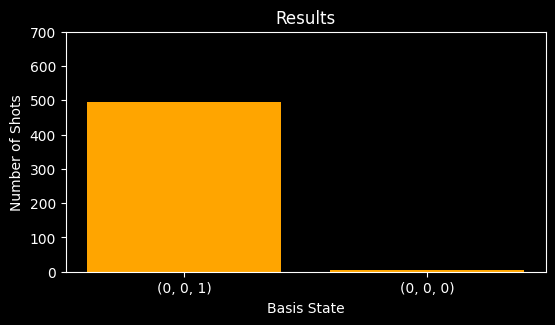

In [7]:
from plotting import plot_results

plot_results(result, dark_mode=True)

## Saving Results

In [8]:
import json

with open("pytket_emulator_example.json", "w") as file:
    json.dump(result.to_dict(), file)

## Custom Noise Parameters

Override default noise values for the simulation

In [13]:
from pytket import Circuit

machine_name = "H1-2E"

backend = QuantinuumBackend(machine_name)

test_circ = Circuit(4).H(0).CX(0, 1).CX(0, 2).CX(0, 3).measure_all()
compiled_circ_test = backend.get_compiled_circuit(test_circ)

handle = backend.process_circuit(
    compiled_circ_test,
    n_shots=50,
    request_options={
        "options": {
            "error-params": {
                "p1": 4e-5,
                "p2": 3e-3,
                "p_meas": 3e-3,
                "p_init": 4e-5,
                "p_crosstalk_meas": 1e-5,
                "p_crosstalk_init": 3e-5,
                "p1_emission": 6e-6,
                "p2_emission": 2e-4,
            }
        }
    },
)



In [15]:
result_custom_noise = backend.get_result(handle)

GetResultFailed: Cannot retrieve result; job status is CircuitStatus(status=<StatusEnum.ERROR: 'Circuit has errored. Check CircuitStatus.message for error message.'>, message='{"name": "job", "submit-date": "2023-07-17T11:36:35.227517", "result-date": null, "queue-position": null, "cost": "0", "error": {"code": 1001, "text": "Job Processing Error"}}', error_detail=None, completed_time=None, queued_time=None, submitted_time=None, running_time=None, cancelled_time=None, error_time=None, queue_position=None)

## Stabilzer simulation

In [ ]:
test_circ = Circuit(4).H(0).CX(0, 1).CX(0, 2).CX(0, 3).measure_all()

In [ ]:
stabilizer_backend = QuantinuumBackend(device_name=machine_name, simulator="stabilizer")

In [ ]:


stabilizer_backend = QuantinuumBackend(device_name=machine_name, simulator="stabilizer")

print(machine, "status:", stabilizer_backend.device_state(device_name=machine))
print("Simulation type:", stabilizer_backend.simulator_type)

In [ ]:
n_shots = 100
stabilizer_handle = stabilizer_backend.process_circuit(
    compiled_circuit, n_shots=n_shots
)
print(stabilizer_handle)